Implement a neural network for m-samples and n-features, as we discussed in class (both FP and BP), and for N layers in the hidden layer. Split the data (you can use the log. reg. data or any other one) and train your network with 70% of the data. Use 15% for validation and test your network with the remaining 15% of data. Report the evaluation metrics for the varying number of layers in the network. Plot the training loss curves.

C:\Users\adikw\AppData\Local\Temp\ipykernel_36668\1807246633.py:145: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rain'] = df['Rain'].replace(['rain', 'no rain'], [1, 0])


Data shapes - X: (5, 2500), Y: (1, 2500)
Train set: X_train shape: (5, 1750), Y_train shape: (1, 1750)
Validation set: X_val shape: (5, 375), Y_val shape: (1, 375)
Test set: X_test shape: (5, 375), Y_test shape: (1, 375)

--------------------------------------------------
Training Architecture 1: [5, 1]
--------------------------------------------------
Iteration 0, Train Cost: 1.403959, Val Cost: 1.419823
Iteration 1000, Train Cost: 0.284081, Val Cost: 0.279223
Iteration 2000, Train Cost: 0.214058, Val Cost: 0.203780
Iteration 3000, Train Cost: 0.193987, Val Cost: 0.182460
Iteration 4000, Train Cost: 0.183192, Val Cost: 0.171482
Iteration 5000, Train Cost: 0.176121, Val Cost: 0.164554
Iteration 6000, Train Cost: 0.171070, Val Cost: 0.159740
Iteration 7000, Train Cost: 0.167275, Val Cost: 0.156193
Iteration 8000, Train Cost: 0.164323, Val Cost: 0.153474
Iteration 9000, Train Cost: 0.161966, Val Cost: 0.151327

Test Metrics for Architecture 1: [5, 1]:
Accuracy: 0.9173
Precision: 0.7576


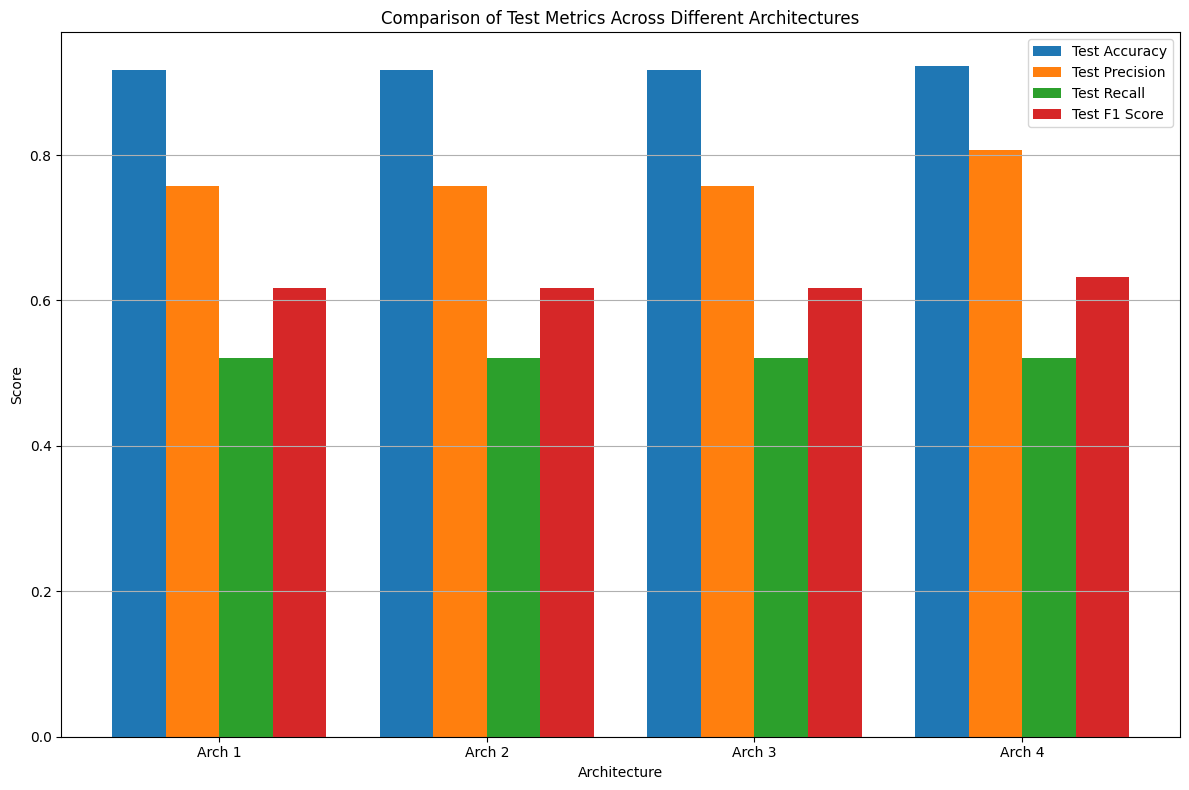

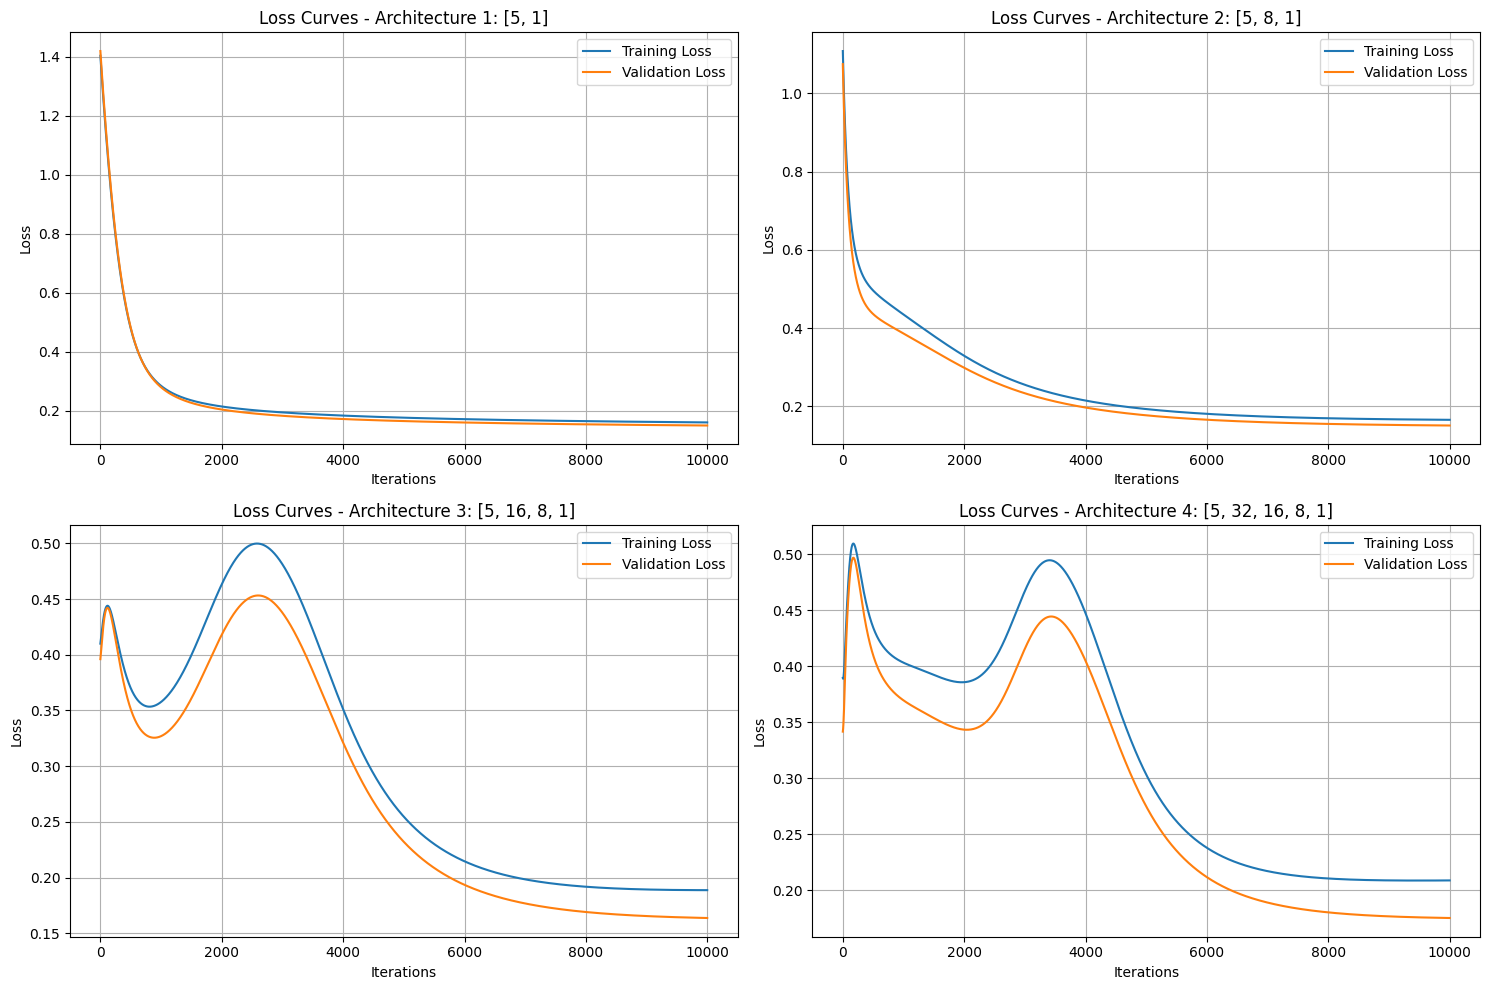

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def log_safe(x):
    return np.log(x + 1e-10)

def cost_function(A, Y):
    m = Y.shape[1]
    cost = -1 * np.sum(Y * log_safe(A) + (1 - Y) * log_safe(1 - A)) / m
    return cost

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) 
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

def forward_propagation(X, parameters):
    cache = {'A0': X}
    L = len(parameters) // 2 #because we have both weights and biases
    A = X
    for l in range(1, L+1):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        A = sigmoid(Z)
        cache['Z' + str(l)] = Z
        cache['A' + str(l)] = A
        
    return A, cache

def backward_propagation(Y, parameters, cache):
    grads = {}
    L = len(parameters) // 2
    m = Y.shape[1]
    
    dA = - (np.divide(Y, cache['A' + str(L)] + 1e-10) - np.divide(1 - Y, 1 - cache['A' + str(L)] + 1e-10))
    
    for l in reversed(range(1, L+1)):
        dZ = cache['A' + str(l)] - Y  
        grads['dW' + str(l)] = np.dot(dZ, cache['A' + str(l-1)].T) / m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m
            
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L+1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]     
    return parameters

def neuralnet(layer_dims, X_train, Y_train, X_val, Y_val, learning_rate=0.01, 
              iterations=10000, print_interval=1000):
    parameters = initialize_parameters(layer_dims)
    
    best_parameters = parameters.copy()
    train_costs = []
    val_costs = []
    
    for i in range(iterations):
        
        A_final_train, cache = forward_propagation(X_train, parameters)
        train_cost = cost_function(A_final_train, Y_train)
        train_costs.append(train_cost)
        
        A_final_val, _ = forward_propagation(X_val, parameters)
        val_cost = cost_function(A_final_val, Y_val)
        val_costs.append(val_cost)
        
        if i % print_interval == 0:
            print(f"Iteration {i}, Train Cost: {train_cost:.6f}, Val Cost: {val_cost:.6f}")
        
        
        grads = backward_propagation(Y_train, parameters, cache)
        
        
        parameters = update_parameters(parameters, grads, learning_rate)
    
    
    return best_parameters, train_costs, val_costs

def predict(X, parameters):
    A_final, _ = forward_propagation(X, parameters)
    return A_final

def evaluate_model(X, Y, parameters):
    
    y_pred_prob = predict(X, parameters)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    acc = accuracy_score(Y.flatten(), y_pred.flatten())
    prec = precision_score(Y.flatten(), y_pred.flatten())
    rec = recall_score(Y.flatten(), y_pred.flatten())
    f1 = f1_score(Y.flatten(), y_pred.flatten())
    cm = confusion_matrix(Y.flatten(), y_pred.flatten())
    
    metrics = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm
    }
    
    return metrics

def plot_loss_curves(train_costs, val_costs, title):

    plt.figure(figsize=(10, 6))
    plt.plot(train_costs, label='Training Loss')
    plt.plot(val_costs, label='Validation Loss')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    return plt


df = pd.read_csv('weather_forecast_data.csv', header=0)

df['Rain'] = df['Rain'].replace(['rain', 'no rain'], [1, 0])
Y = df['Rain'].values.reshape(1, -1)  

def normalize(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std, mean, std



for col in df.columns:
    if col not in ['Rain']:
        df[col], mean, std = normalize(df[col])


X_original = df.drop(columns=['Rain']).values
X = X_original.T  

print(f"Data shapes - X: {X.shape}, Y: {Y.shape}")


X_train, X_temp, Y_train, Y_temp = train_test_split(X.T, Y.T, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


X_train = X_train.T
X_val = X_val.T
X_test = X_test.T
Y_train = Y_train.T
Y_val = Y_val.T
Y_test = Y_test.T

print(f"Train set: X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"Validation set: X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")
print(f"Test set: X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


input_size = X_train.shape[0]
output_size = 1

architectures = [
    [input_size, output_size],                           # No hidden layers
    [input_size, 8, output_size],                        # 1 hidden layer
    [input_size, 16, 8, output_size],                    # 2 hidden layers
    [input_size, 32, 16, 8, output_size]                 # 3 hidden layers
]

results = {}


for i, layer_dims in enumerate(architectures):
    architecture_name = f"Architecture {i+1}: {layer_dims}"
    print(f"\n{'-'*50}\nTraining {architecture_name}\n{'-'*50}")
    
    
    parameters, train_costs, val_costs = neuralnet(
        layer_dims, X_train, Y_train, X_val, Y_val,
        learning_rate=0.01, iterations=10000, print_interval=1000
    )
    
    test_metrics = evaluate_model(X_test, Y_test, parameters)
    
    results[architecture_name] = {
        'parameters': parameters,
        'train_costs': train_costs,
        'val_costs': val_costs,
        'test_metrics': test_metrics
    }
    
    print(f"\nTest Metrics for {architecture_name}:")
    print(f"Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Precision: {test_metrics['precision']:.4f}")
    print(f"Recall: {test_metrics['recall']:.4f}")
    print(f"F1 Score: {test_metrics['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{test_metrics['confusion_matrix']}")
    
    plt = plot_loss_curves(train_costs, val_costs, f"Loss Curves - {architecture_name}")
    plt.savefig(f"loss_curves_arch_{i+1}.png")
    plt.close()


print("\n" + "="*50)
print("Summary of Results")
print("="*50)


comparison = {
    'Architecture': [],
    'Num Layers': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': []
}

for arch_name, arch_results in results.items():
    comparison['Architecture'].append(arch_name)
    comparison['Num Layers'].append(len(arch_results['parameters']) // 2)
    comparison['Test Accuracy'].append(arch_results['test_metrics']['accuracy'])
    comparison['Test Precision'].append(arch_results['test_metrics']['precision'])
    comparison['Test Recall'].append(arch_results['test_metrics']['recall'])
    comparison['Test F1 Score'].append(arch_results['test_metrics']['f1_score'])


comparison_df = pd.DataFrame(comparison)
print(comparison_df)


metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score']
plt.figure(figsize=(12, 8))
x = np.arange(len(comparison['Architecture']))
width = 0.2
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison[metric], width, label=metric)

plt.xlabel('Architecture')
plt.ylabel('Score')
plt.title('Comparison of Test Metrics Across Different Architectures')
plt.xticks(x + width*1.5, [f'Arch {i+1}' for i in range(len(comparison['Architecture']))])
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.savefig('architecture_comparison.png')
plt.show()


plt.figure(figsize=(15, 10))
for i, (arch_name, arch_results) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(arch_results['train_costs'], label='Training Loss')
    plt.plot(arch_results['val_costs'], label='Validation Loss')
    plt.title(f'Loss Curves - {arch_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('all_loss_curves.png')
plt.show()